<a href="https://colab.research.google.com/github/bhuvanabasapur/CMPE-257/blob/main/CMPE297_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd
import random
file = "/content/gdrive/MyDrive/Colab Notebooks/CMPE 257/Asteroid_Updated.csv"
n = sum(1 for line in open(file)) - 1 #number of records in file (excludes header)
s = 100000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df = pd.read_csv(file, skiprows=skip)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,10,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            2545 non-null    object 
 1   a               100000 non-null  float64
 2   e               100000 non-null  float64
 3   i               100000 non-null  float64
 4   om              100000 non-null  float64
 5   w               100000 non-null  float64
 6   q               100000 non-null  float64
 7   ad              100000 non-null  float64
 8   per_y           100000 non-null  float64
 9   data_arc        98089 non-null   float64
 10  condition_code  99897 non-null   object 
 11  n_obs_used      100000 non-null  int64  
 12  H               99688 non-null   float64
 13  neo             100000 non-null  object 
 14  pha             97990 non-null   object 
 15  diameter        16398 non-null   float64
 16  extent          1 non-null       object 
 17  albedo     

In [5]:
df.head(10)

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.400,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8,0.782,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
1,Iris,2.385334,0.231206,5.523651,259.563231,145.265106,1.833831,2.936837,3.684105,62452.0,0,5206,5.51,N,N,199.830,NaN,0.2766,7.139000,NaN,0.855,0.484,NaN,S,S,NaN,0.846100,MBA,0.267535,1345.619196,140.419656
2,Proserpina,2.654331,0.090145,3.563413,45.778003,193.449778,2.415057,2.893605,4.324549,57981.0,0,2320,7.40,N,N,94.800,NaN,0.1966,13.110000,NaN,0.891,0.525,NaN,S,S,NaN,1.402870,MBA,0.227914,1579.541423,105.723603
3,Amphitrite,2.554114,0.072696,6.082523,356.341767,63.363240,2.368441,2.739786,4.081958,59923.0,0,2318,5.85,N,N,189.559,NaN,0.2160,5.392100,NaN,0.838,0.449,NaN,S,S,0.20,1.387100,MBA,0.241459,1490.935075,284.235315
4,Urania,2.365572,0.127581,2.095744,307.468613,87.426207,2.063770,2.667374,3.638417,58325.0,0,3332,7.57,N,N,92.787,NaN,0.1920,13.686000,NaN,0.873,0.459,NaN,Sl,S,NaN,1.070900,MBA,0.270894,1328.931884,29.097935
5,Circe,2.687383,0.105948,5.496017,184.361310,330.676144,2.402660,2.972106,4.405576,56799.0,0,3250,8.51,N,N,132.992,NaN,0.0520,12.150000,NaN,0.707,0.357,NaN,Ch,C,NaN,1.414350,MBA,0.223722,1609.136457,126.686961
6,Atalante,2.746824,0.304906,18.369263,358.210032,47.796533,1.909301,3.584347,4.552547,56148.0,0,1777,8.46,N,N,115.204,NaN,0.0360,9.930000,NaN,0.713,0.363,NaN,NaN,C,NaN,0.959267,MBA,0.216500,1662.817848,299.729035
7,Hestia,2.525788,0.172002,2.349674,181.087489,177.417167,2.091347,2.960230,4.014243,56821.0,0,3401,8.36,N,N,112.414,NaN,0.0460,21.040000,NaN,0.692,0.226,NaN,Xc,P,0.06,1.086710,MBA,0.245532,1466.202262,69.900434
8,Aglaja,2.881429,0.129807,4.975208,3.081370,314.687300,2.507399,3.255460,4.891254,58323.0,0,2953,7.84,N,N,168.174,NaN,0.0820,13.178000,NaN,0.665,0.300,NaN,B,C,0.16,1.496610,MBA,0.201508,1786.530377,52.278845
9,Niobe,2.756530,0.173322,23.262422,316.004320,266.975061,2.278762,3.234297,4.576697,56731.0,0,2419,7.30,N,N,83.420,NaN,0.3052,35.864000,NaN,0.803,0.439,NaN,Xe,S,0.40,1.409540,MBA,0.215358,1671.638659,264.052853


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

def percent_value_counts(df, feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [8]:
missing_percentage(df)

,Total,Percent
IR,100000,100.00
GM,99999,100.00
extent,99999,100.00
G,99987,99.99
UB,99892,99.89
spec_T,99890,99.89
BV,99887,99.89
spec_B,99814,99.81
rot_per,97852,97.85
name,97455,97.46


## Data Wrangling

In [9]:
tooMuchNa = df.columns[df.isna().sum()/df.shape[0] > 0.80]
df = df.drop(tooMuchNa,axis=1)


In [10]:
missing_percentage(df)

,Total,Percent
pha,2010,2.01
moid,2010,2.01
data_arc,1911,1.91
H,312,0.31
condition_code,103,0.10
ma,1,0.00
neo,0,0.00
class,0,0.00
n_obs_used,0,0.00
per,0,0.00


In [11]:
df=df.dropna()

In [12]:
df.head(10)

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,moid,class,n,per,ma
0,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,1.139480,MBA,0.271609,1325.432765,95.861936
1,2.385334,0.231206,5.523651,259.563231,145.265106,1.833831,2.936837,3.684105,62452.0,0,5206,5.51,N,N,0.846100,MBA,0.267535,1345.619196,140.419656
2,2.654331,0.090145,3.563413,45.778003,193.449778,2.415057,2.893605,4.324549,57981.0,0,2320,7.40,N,N,1.402870,MBA,0.227914,1579.541423,105.723603
3,2.554114,0.072696,6.082523,356.341767,63.363240,2.368441,2.739786,4.081958,59923.0,0,2318,5.85,N,N,1.387100,MBA,0.241459,1490.935075,284.235315
4,2.365572,0.127581,2.095744,307.468613,87.426207,2.063770,2.667374,3.638417,58325.0,0,3332,7.57,N,N,1.070900,MBA,0.270894,1328.931884,29.097935
5,2.687383,0.105948,5.496017,184.361310,330.676144,2.402660,2.972106,4.405576,56799.0,0,3250,8.51,N,N,1.414350,MBA,0.223722,1609.136457,126.686961
6,2.746824,0.304906,18.369263,358.210032,47.796533,1.909301,3.584347,4.552547,56148.0,0,1777,8.46,N,N,0.959267,MBA,0.216500,1662.817848,299.729035
7,2.525788,0.172002,2.349674,181.087489,177.417167,2.091347,2.960230,4.014243,56821.0,0,3401,8.36,N,N,1.086710,MBA,0.245532,1466.202262,69.900434
8,2.881429,0.129807,4.975208,3.081370,314.687300,2.507399,3.255460,4.891254,58323.0,0,2953,7.84,N,N,1.496610,MBA,0.201508,1786.530377,52.278845
9,2.756530,0.173322,23.262422,316.004320,266.975061,2.278762,3.234297,4.576697,56731.0,0,2419,7.30,N,N,1.409540,MBA,0.215358,1671.638659,264.052853


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97615 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   a               97615 non-null  float64
 1   e               97615 non-null  float64
 2   i               97615 non-null  float64
 3   om              97615 non-null  float64
 4   w               97615 non-null  float64
 5   q               97615 non-null  float64
 6   ad              97615 non-null  float64
 7   per_y           97615 non-null  float64
 8   data_arc        97615 non-null  float64
 9   condition_code  97615 non-null  object 
 10  n_obs_used      97615 non-null  int64  
 11  H               97615 non-null  float64
 12  neo             97615 non-null  object 
 13  pha             97615 non-null  object 
 14  moid            97615 non-null  float64
 15  class           97615 non-null  object 
 16  n               97615 non-null  float64
 17  per             97615 non-null 

In [14]:
#@
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [15]:
#@
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e6b54e630>,
      dtype=object)

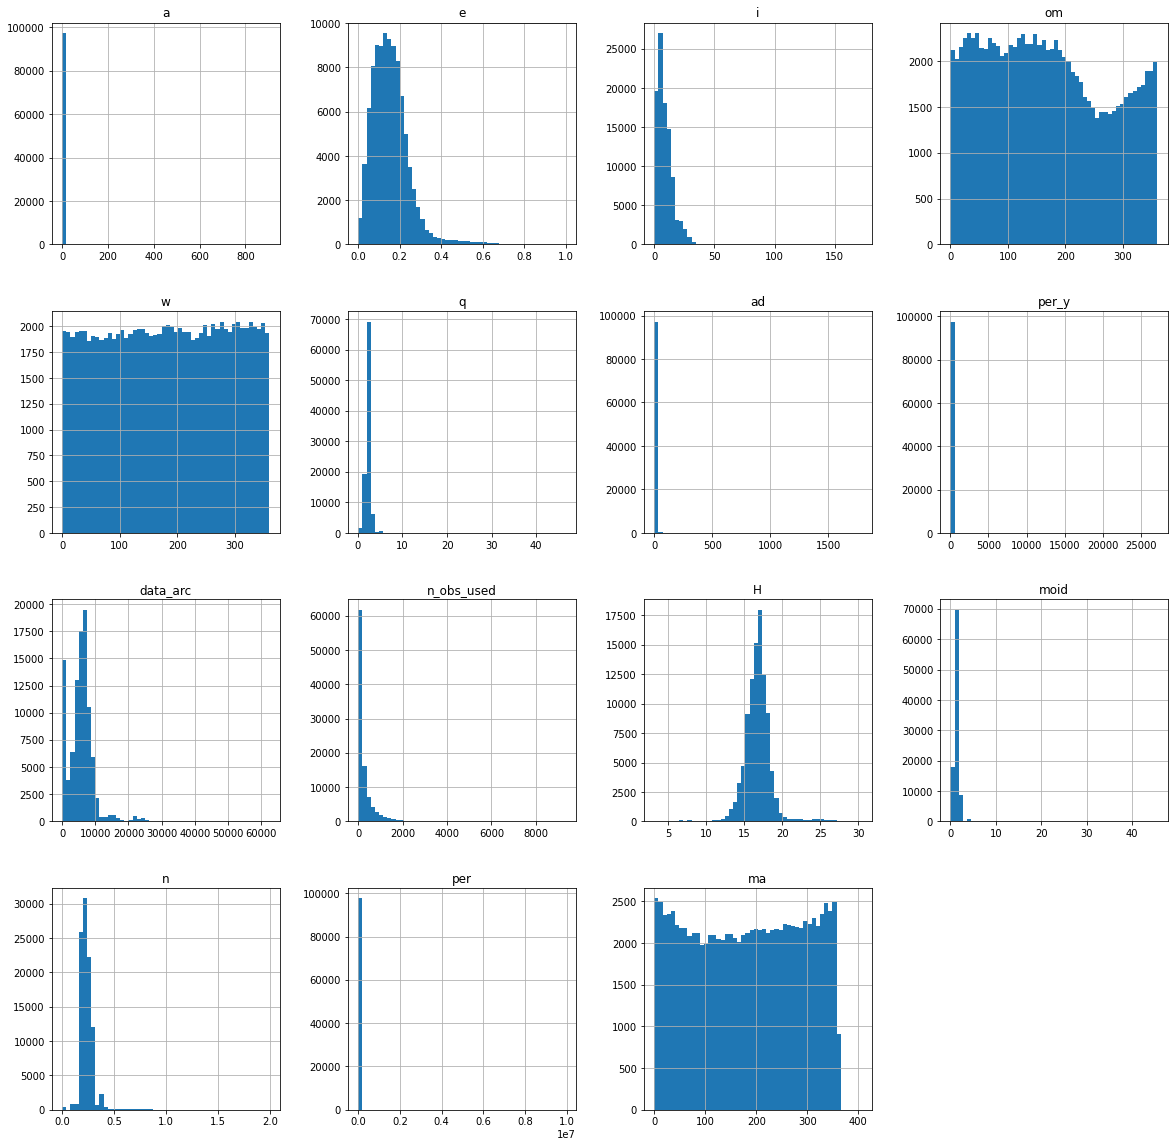

In [16]:
df.hist(bins = 50, figsize = (20,20))

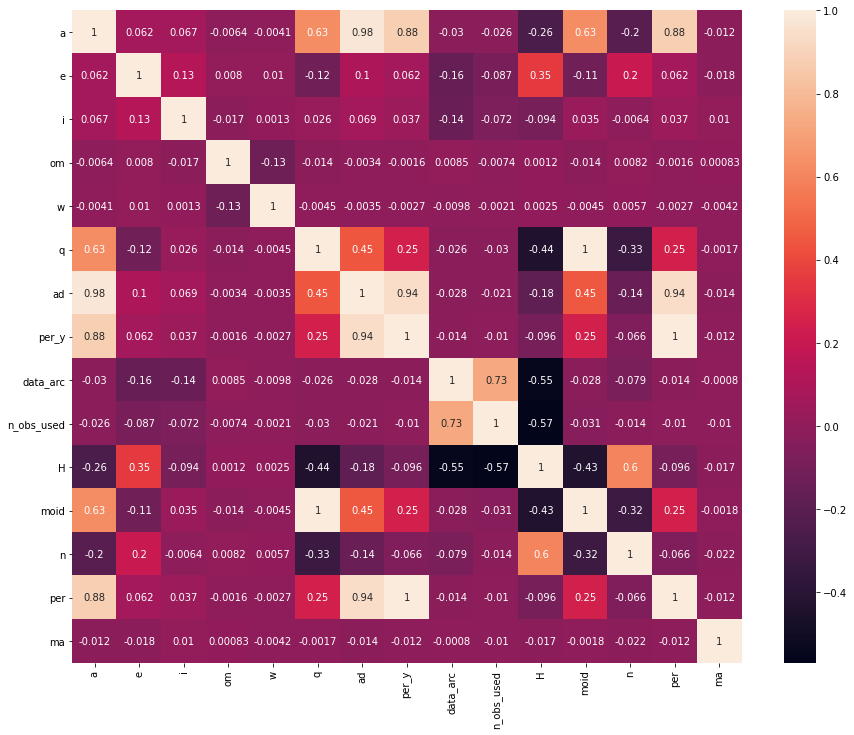

In [17]:
import seaborn as sns
#dataset.info()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_data = df.select_dtypes(include=numerics)
#num_data.info()
plt.subplots(figsize=(15,12))
sns.heatmap(num_data.corr(),annot=True,annot_kws={'size':10})
#num_data.corr()

In [18]:
#High correlation between moid-Q, per_y-per, ad-per

In [19]:

df = df.drop(['neo','pha', 'class'],axis=1)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97615 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   a               97615 non-null  float64
 1   e               97615 non-null  float64
 2   i               97615 non-null  float64
 3   om              97615 non-null  float64
 4   w               97615 non-null  float64
 5   q               97615 non-null  float64
 6   ad              97615 non-null  float64
 7   per_y           97615 non-null  float64
 8   data_arc        97615 non-null  float64
 9   condition_code  97615 non-null  object 
 10  n_obs_used      97615 non-null  int64  
 11  H               97615 non-null  float64
 12  moid            97615 non-null  float64
 13  n               97615 non-null  float64
 14  per             97615 non-null  float64
 15  ma              97615 non-null  float64
dtypes: float64(14), int64(1), object(1)
memory usage: 12.7+ MB


In [36]:
X = df.iloc[:, [0,5]].values
X

array([[2.3614179 , 2.15190945],
       [2.38533381, 1.83383082],
       [2.65433089, 2.41505656],
       ...,
       [2.43475047, 0.99231204],
       [1.08272872, 0.80957362],
       [1.41239505, 0.88590558]])

## Clustering using K-Means(Scikit)

In [22]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

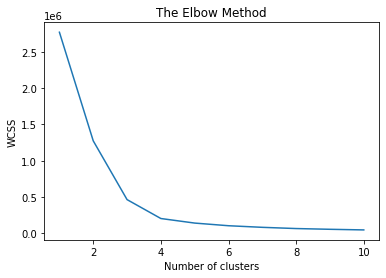

In [23]:
from sklearn.cluster import KMeans
# Within-Cluster-Sum-of-Squares 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

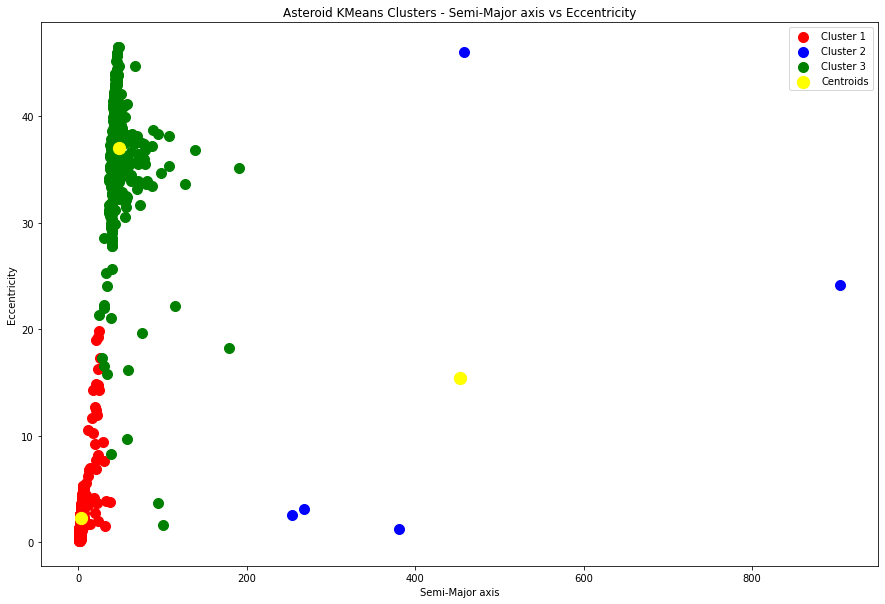

In [25]:
plt.figure(figsize=(15,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Asteroid KMeans Clusters - Semi-Major axis vs Eccentricity')
plt.xlabel('Semi-Major axis')
plt.ylabel('Eccentricity')
plt.legend()
plt.show()

K-Means using Pytorch

In [40]:
!pip install kmeans-pytorch

In [42]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kmeans_pytorch import kmeans, kmeans_predict

In [43]:
# data
data_size, dims, num_clusters = X, 2, 3
x = torch.from_numpy(X)

In [44]:
# k-means
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance='euclidean'
)

[running kmeans]: 1it [00:00,  6.05it/s, center_shift=10.238055, iteration=1, tol=0.000100]

running k-means on cpu..


[running kmeans]: 8it [00:00, 16.68it/s, center_shift=0.000038, iteration=8, tol=0.000100]


In [45]:
# cluster IDs and cluster centers
print(cluster_ids_x)
print(cluster_centers)

tensor([2, 2, 1,  ..., 2, 2, 2])
tensor([[53.3125, 36.7986],
        [ 3.0657,  2.6978],
        [ 2.4173,  1.9744]])


In [46]:
# more data
y = np.random.randn(3, dims) / 6
y_kmeans = torch.from_numpy(y)
# predict cluster ids for y
cluster_ids_y = kmeans_predict(
    y_kmeans, cluster_centers, 'euclidean'
)
print(cluster_ids_y)

predicting on cpu..
tensor([2, 2, 2])


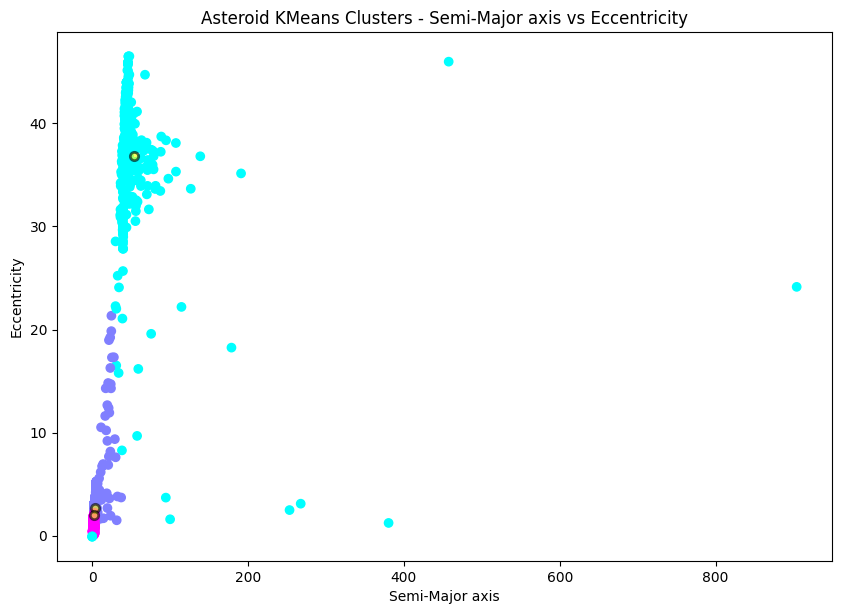

In [47]:
# plot
plt.figure(figsize=(10, 7), dpi=100)
plt.scatter(x[:, 0], x[:, 1], c=cluster_ids_x, cmap='cool')
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='cool')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='yellow', alpha=0.6, edgecolors='black', linewidths=2)
plt.title('Asteroid KMeans Clusters - Semi-Major axis vs Eccentricity')
plt.xlabel('Semi-Major axis')
plt.ylabel('Eccentricity')
plt.show()

Clustering using OPTICS

In [29]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec

In [ ]:
clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)
clust.fit(X)

In [28]:
# print('Estimated number of clusters: %d' % n_clusters_)
# print('Estimated number of noise points: %d' % n_noise_)